In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
df = pd.read_csv('./data/dataset_cleaned.csv')

# extract all columns except 'goal' --> X
X = df.loc[:, df.columns != 'goal']
# extract only the column 'goal' --> y
y = df.loc[:, 'goal']

# add new axis to y, new shape: (n, 1)
y = y.to_numpy()
y = y.reshape((len(y),1))

# binarize y
y[y>0] = 1

factor_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
numeric_columns = [column for column in X.columns if column not in factor_columns]

# transform factors into onehot vectors
# X = pd.get_dummies(X, columns=factor_columns)

# min max scaling of numeric columns
# scaler = MinMaxScaler()
# X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0

In [22]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

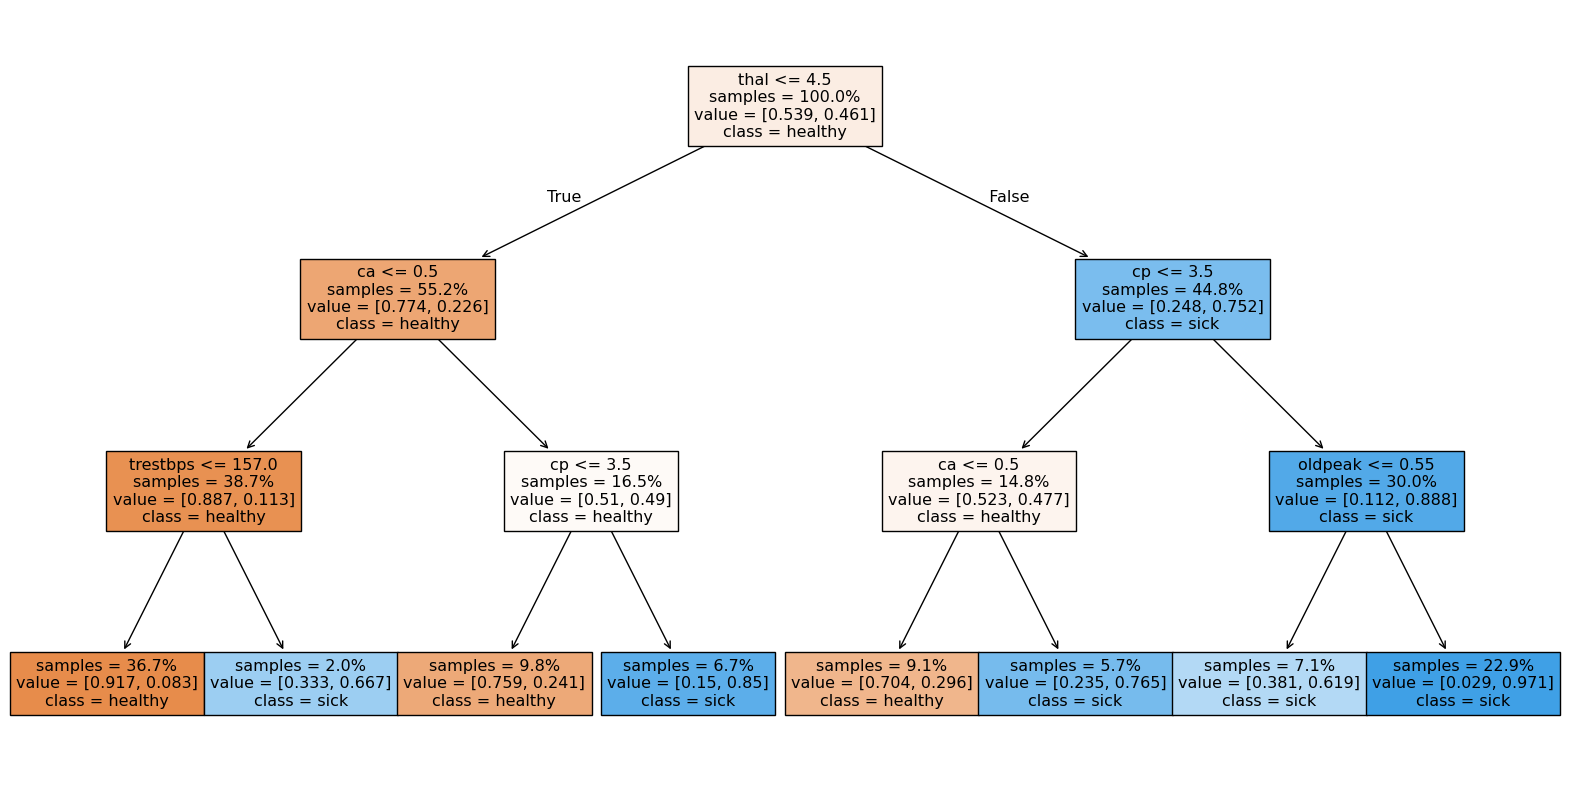

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
ax=plot_tree(model, 
          feature_names=X.columns,
          class_names=['healthy', 'sick'],
          proportion=True,
          impurity=False,
         filled=True)
plt.savefig('tree.png',dpi=800)
plt.show()